In [1]:
# load all the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import squarify

In [2]:
# Load the expenditures.txt into the dataframe
expenditures = pd.read_csv('expenditures.txt', sep = '\t', header=0)
expenditures

,year,category,expenditure,sex
0,2008,Food,6443,1
1,2008,Alcoholic Beverages,444,1
2,2008,Housing,17109,1
3,2008,Apparel,1801,1
4,2008,Transportation,8604,1
...,...,...,...,...
345,1984,Education,303,1
346,1984,Tobacco Products,228,1
347,1984,Miscellaneous,451,1
348,1984,Cash Contributions,706,1


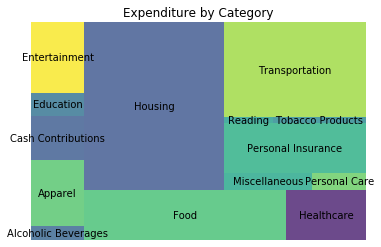

In [3]:
# Tree Map

# Calculate total expenditure for categories
expenditures_cat = expenditures.groupby(['category'])['expenditure'].sum().reset_index()

squarify.plot(sizes=expenditures_cat['expenditure'], label=expenditures_cat['category'], alpha=.8 )
plt.title('Expenditure by Category')
plt.axis('off')
plt.show()

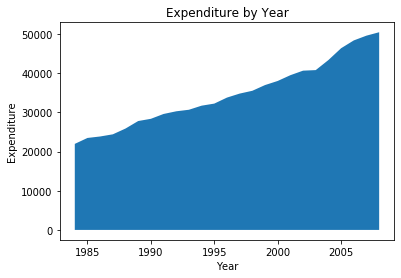

In [4]:
# Calculate total expenditure by year
expenditures_year = expenditures.groupby(['year'])['expenditure'].sum().reset_index()

# Area Chart
plt.fill_between(expenditures_year['year'], expenditures_year['expenditure'])
plt.xlabel('Year')
plt.ylabel('Expenditure')
plt.title('Expenditure by Year')
plt.show()

In [5]:
# Reorganize the shape of dataset structure for stacked area chart
expenditures_reorg = expenditures.loc[:, expenditures.columns != 'sex'].pivot(index='year', columns='category', values='expenditure')
expenditures_reorg.reset_index(level=0, inplace=True)

#Get label name
labs = expenditures_reorg.columns[1:].values.tolist()

# see the sample of the data
print("Reorganized Dataframe : ")
expenditures_reorg.head()

Reorganized Dataframe : 


category,year,Alcoholic Beverages,Apparel,Cash Contributions,Education,Entertainment,Food,Healthcare,Housing,Miscellaneous,Personal Care,Personal Insurance,Reading,Tobacco Products,Transportation
0,1984,275,1319,706,303,1055,3290,1049,6674,451,289,1897,132,228,4304
1,1985,306,1420,805,321,1170,3477,1108,7087,529,303,2016,141,219,4587
2,1986,271,1346,746,314,1149,3448,1135,7292,522,303,2127,140,230,4842
3,1987,289,1446,741,337,1193,3664,1135,7569,562,330,2175,142,232,4600
4,1988,269,1489,693,342,1329,3748,1298,8079,578,334,2249,150,242,5093


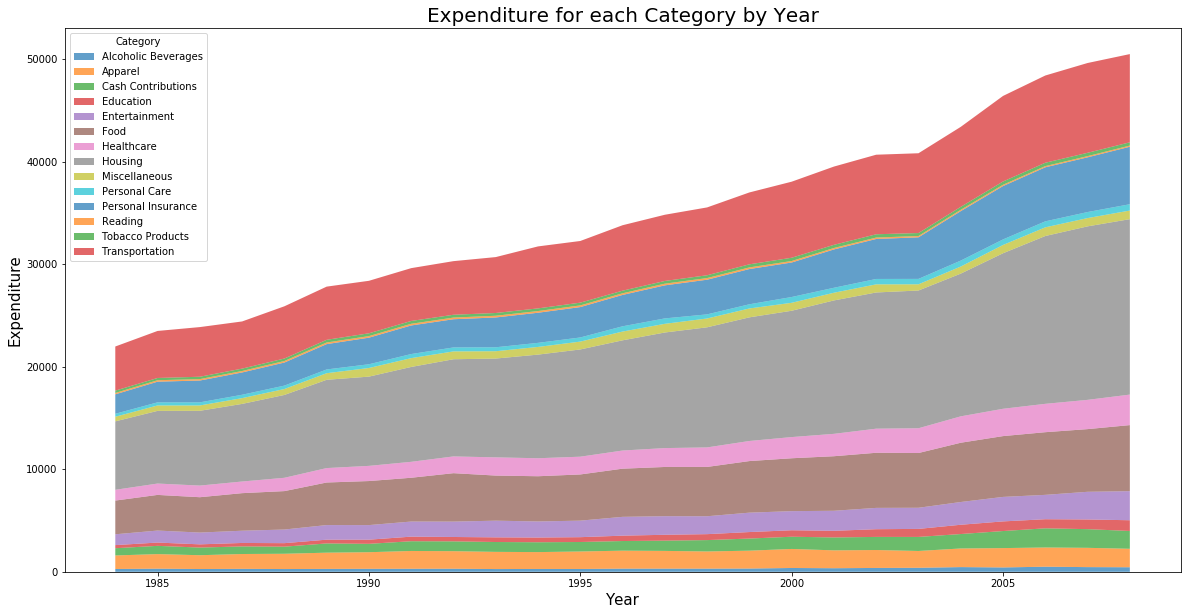

In [6]:
# Stacked Area Chart
plt.figure(figsize=(20,10))
plt.stackplot(expenditures_reorg['year'], 
              expenditures_reorg['Alcoholic Beverages'], 
              expenditures_reorg['Apparel'], 
              expenditures_reorg['Cash Contributions'],
              expenditures_reorg['Education'],
              expenditures_reorg['Entertainment'],
              expenditures_reorg['Food'],
              expenditures_reorg['Healthcare'],
              expenditures_reorg['Housing'],
              expenditures_reorg['Miscellaneous'],
              expenditures_reorg['Personal Care'],
              expenditures_reorg['Personal Insurance'],
              expenditures_reorg['Reading'],
              expenditures_reorg['Tobacco Products'],
              expenditures_reorg['Transportation'],
              labels=labs, alpha=0.7)
plt.title('Expenditure for each Category by Year', fontsize=20)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Expenditure', fontsize=15)
plt.legend(title='Category', fontsize=10, ncol=1, loc = 'upper left')